# IANNwTF - Homework 02
(by Group 17 - Nils Niehaus, Philipp Bauer, Marlon Dammann)

In [1]:
import numpy as np
from math import e as exp
import matplotlib.pyplot as plt

## 1 - Preparation

In [2]:
def sigmoid(x):
    '''The sigmoid activation function'''
    return 1/(1+exp**(-x))

def sigmoidprime(x):
    '''The derivative of the sigmoid activation function'''
    return (exp**(-x))/(1+exp**(-x))**2

## 2 - Data Set

In [3]:
possible_combinations = np.array([[1,1],[1,0],[0,1],[0,0]])
and_labels = np.array([1,0,0,0])
or_labels = np.array([1,1,1,0])
not_and_labels = np.array([0,1,1,1])
not_or_labels = np.array([0,0,0,1])
xor_labels = np.array([0,1,1,0])

## 3 - Perceptron
(For this task we have imported and rewritten the Perceptron class from last semester of Machine Learning)

In [4]:
class Perceptron:
    """Single neuron handling its own weights and bias."""

    def __init__(self, input_units, act_func=sigmoid, learning_rate=1.):
        """Initialize a new neuron with its weights and bias.

        Args:
            input_units (int): Dimensionality of the data coming into this perceptron. 
                In a network of perceptrons this basically represents the 
                number of neurons in the layer before this neuron's layer. 
                Used for generating the perceptron's weights vector, which 
                not only includes one weight per input but also an additional 
                bias weight.
            act_fun (function): Function to apply on activation.
            learning_rate (float): Learning rate applied in backpropagation.
        """
        self.act_func = act_func
        self.alpha = learning_rate
        self.bias = np.random.randn(1)
        self.weights = np.random.randn(input_units)
        self.output = None

    def forward_step(self, x):
        """Activate this neuron with a specific input.

        Calculate the weighted sum of inputs and apply the activation function.

        Args:
            x (ndarray): Vector of input values.

        Returns:
            float: A real number representing the perceptron's activation after 
            calculating the weighted sum of inputs and applying the 
            perceptron's activation function.
        """
        # Correct inout in case it is a single number
        if type(x) != type(np.array):
            x = np.array([x])
        if len(x.shape) == 2:
            x = x[0]
        self.x = x
        # Return the activation value
        self.output = np.append([self.bias], [weight*input_val for weight, input_val in zip(self.weights,x)])
        return self.act_func(np.sum(self.output))

    def update(self, delta):
        """Adapt this neuron's weights by a specific delta.

        Args:
            delta (float): Error term.
        """
        # Adapt self.weights according to the update rule
        deltaBias = delta * sigmoidprime(np.sum(self.output))
        self.bias -= self.alpha*deltaBias
        for i in range(0, len(self.weights)):
            deltaWeight = delta * self.x[i]
            self.weights[i] -= self.alpha*deltaWeight

## 4 - Multi-Layer Perceptron

In [5]:
class MultiLayerPerceptron:
    '''The Multi-Layer Perceptron class'''
    def __init__(self,size=(2,4,1)):
        self.perceptron_layers = []
        for i in range(len(size)):
            if i == 0:
                self.perceptron_layers.append([Perceptron(1) for j in range(size[i])])
            else:
                self.perceptron_layers.append([Perceptron(size[i-1]) for j in range(size[i])])
        self.perceptron_layers = np.array(self.perceptron_layers)
        
    def forward_step(self,x):
        output = [self.perceptron_layers[0][i].forward_step(np.array(x[i])) for i in range(len(x))]
        for i in range(1,len(self.perceptron_layers)):
            output = [self.perceptron_layers[i][j].forward_step(output) for j in range(len(self.perceptron_layers[i]))]
        return output
    
    def backprop_step(self, target, output):
        '''Iterate over output layer'''
        delta = [[]]
        for i in range(len(self.perceptron_layers[len(self.perceptron_layers)-1])):
            delta[0].append((-1)*(target-output)*sigmoidprime(np.sum(self.perceptron_layers[len(self.perceptron_layers)-1][i].output)))
            self.perceptron_layers[len(self.perceptron_layers)-1][i].update(delta[0][i])

        '''Iterate over hidden layer to input layer'''
        for i in range(len(self.perceptron_layers)-1):
            delta.append([])
            for j in range(len(self.perceptron_layers[len(self.perceptron_layers)-2-i])):
                delta[i+1].append(np.sum([delta[i][k]*self.perceptron_layers[len(self.perceptron_layers)-1][k].weights[j] for k in range(len(self.perceptron_layers[len(self.perceptron_layers)-1]))])*sigmoidprime(np.sum(self.perceptron_layers[len(self.perceptron_layers)-2-i][j].output)))
                self.perceptron_layers[len(self.perceptron_layers)-2-i][j].update(delta[i+1][j])

## 5 - Training

In [6]:
def training_epoch(model,dataset,labels):
    avg_loss = []
    accuracy = []
    for data,target in list(zip(dataset,labels)):
        output = model.forward_step(data)[0]
        
        avg_loss += [(target - output)**2]
        
        if output <= 0.5 and target == 0:
            accuracy += [1]
        elif output >= 0.5 and target == 1:
            accuracy += [1]
        else:
            accuracy += [0]
            
        model.backprop_step(target, output)
    return np.mean(avg_loss), np.mean(accuracy)

In [7]:
model = MultiLayerPerceptron()
total_avg_loss = []
total_accuracy = []
for epoch_num in range(1000):
    a,b = training_epoch(model,possible_combinations,and_labels)
    total_avg_loss += [a]
    total_accuracy += [b]

C:\Users\marlo\AppData\Local\Temp/ipykernel_13376/188105780.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.perceptron_layers = np.array(self.perceptron_layers)


## 6 - Visualization

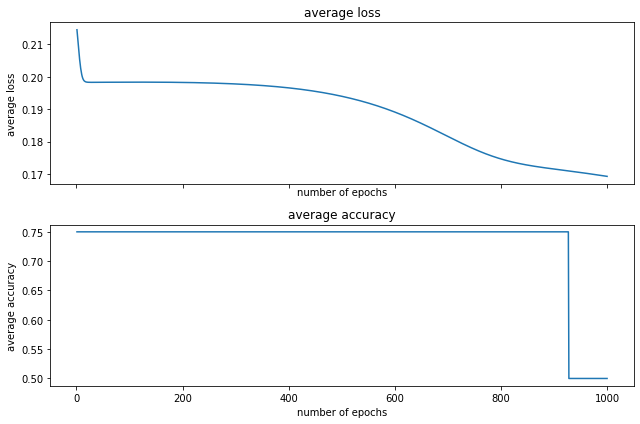

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 6))
axes[0].set(title="average loss")
axes[1].set(title="average accuracy")

x = np.array(list(range(1,1001)))
y_1 = np.array(total_avg_loss)
y_2 = total_accuracy

axes[0].set(
        title="average loss",
        ylabel="average loss", 
        xlabel="number of epochs"
)

axes[1].set(
        title="average accuracy",
        ylabel="average accuracy", 
        xlabel="number of epochs"
)

axes[0].plot(x, y_1)
axes[1].plot(x, y_2)

fig.tight_layout()

plt.show()